# 2D Audio Feature Extraction & Visualization Demo

This notebook demonstrates how to extract and visualize 2D audio features (MFCC, Chroma, Mel-Spectrogram) using the audio_features library. It uses a sample audio file from your environment variables (ESC_50_dataset or UrbanSound8K_dataset).

## Requirements

Place your dataset path at `DATASET_PATH`.

In [ ]:
import os

from AFX.io.io import load_audio
from AFX.utils.config_loader import load_config
from AFX.extract_all import extract_all_features
from AFX.utils.visualization import plot_mfcc, plot_spectrogram

import pandas as pd

In [ ]:
DATASET_PATH = os.getenv('ESC_50_dataset')

In [ ]:
# Load paths
audio_path = DATASET_PATH
config_full_path = os.path.join(os.path.dirname(os.getcwd()), 'AFX', 'config.json')
metadata_path = os.path.join(audio_path, 'meta', 'esc50.csv')

# Load one sample from the dataset
# Note: The dataset should be downloaded and the path set in the environment variable ESC_50_dataset
metadata = pd.read_csv(metadata_path) 
sample = metadata.sample(1).iloc[0]
audio_file = os.path.join(audio_path, 'audio', sample['filename'])

# Load configuration and audio
config = load_config(config_full_path)
signal, sr = load_audio(audio_file, sr=config['sample_rate'])

In [3]:
# Extract features
features = extract_all_features(signal, sr, config)

print(f"Loaded audio: {audio_file}, Sample rate: {sr}")

d:\GitHub\audio_features\.venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=512
  warnings.warn(
d:\GitHub\audio_features\.venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=256
  warnings.warn(
d:\GitHub\audio_features\.venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=128
  warnings.warn(
d:\GitHub\audio_features\.venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=64
  warnings.warn(
d:\GitHub\audio_features\.venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=32
  warnings.warn(
d:\GitHub\audio_features\.venv\Lib\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Loaded audio: D:\datasets\ESC-50-master\audio\4-204123-A-39.wav, Sample rate: 22050


In [4]:
features.keys()  # Print all extracted features keys

dict_keys(['zcr', 'variance', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'melspectrogram', 'mfcc', 'mfcc_delta', 'chroma_cqt', 'pitch', 'thd', 'hnr'])

## Visualize MFCCs
MFCCs (Mel-Frequency Cepstral Coefficients) are a popular 2D feature for audio analysis.

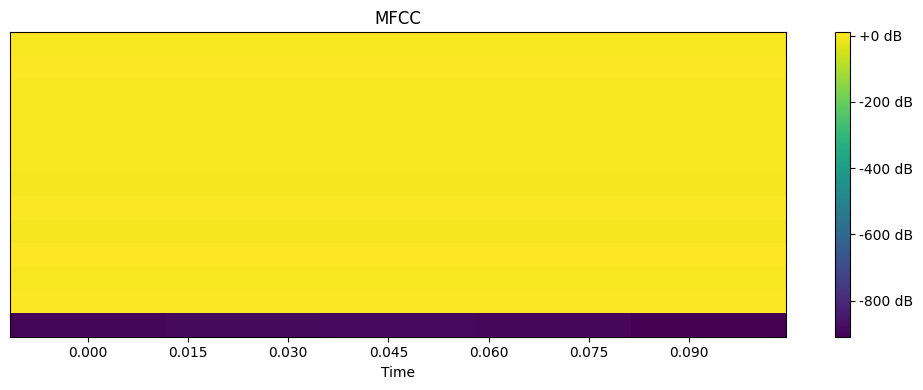

In [5]:
if 'mfcc' in features:
    mfcc = features['mfcc']
    # Ensure MFCC is 2D for visualization
    if mfcc.ndim == 1:
        # Get the number of MFCC coefficients from the config or set a default
        n_mfcc = config.get('n_mfcc', 13)
        #n_mfcc = 13  # Default or from config
        mfcc = mfcc.reshape((n_mfcc, -1))
    n_frames = mfcc.shape[1]
    plot_mfcc(mfcc, sr)
else:
    print('MFCC not found in extracted features.')

## Visualize Chroma (CQT)
Chroma features represent the intensity of each pitch class.

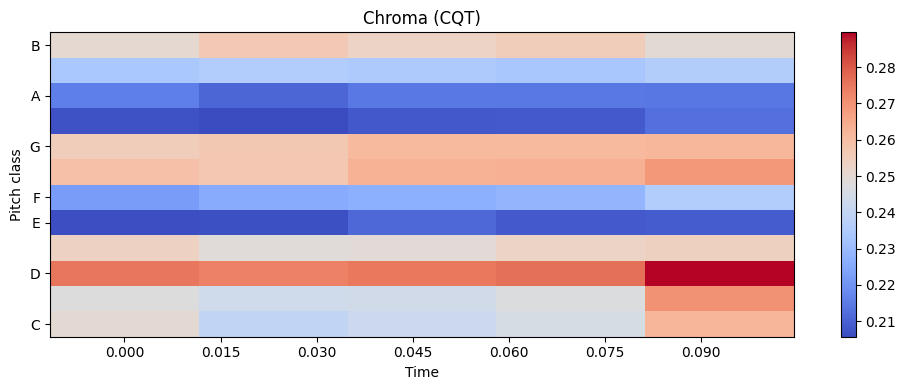

In [6]:
if 'chroma_cqt' in features:
    import matplotlib.pyplot as plt
    import librosa.display

    chroma_cqt = features['chroma_cqt']
    # Get the chroma_cqt shape from config or set a default
    n_chroma = config.get('n_chroma', 12)  # Default to 12 chroma bins

    # Ensure Chroma CQT is 2D for visualization
    if chroma_cqt.ndim == 1:
        chroma_cqt = chroma_cqt.reshape((n_chroma, -1))  # Assuming 12 chroma bins

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma_cqt, x_axis='time', y_axis='chroma', sr=sr, cmap='coolwarm')
    plt.colorbar()
    plt.title('Chroma (CQT)')
    plt.tight_layout()
    plt.show()
else:
    print('Chroma (CQT) not found in extracted features.')

## Visualize Mel-Spectrogram
The Mel-Spectrogram is a 2D representation of the signal's energy in Mel frequency bands over time.

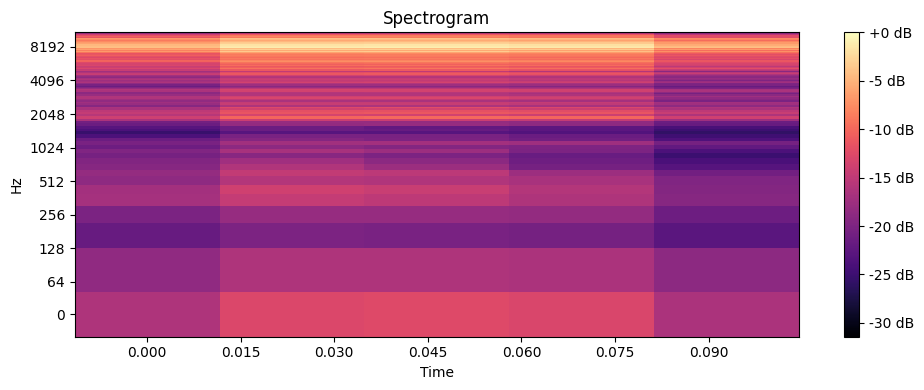

In [7]:
if 'melspectrogram' in features:
    melspectrogram = features['melspectrogram']
    # Ensure Mel-Spectrogram is 2D for visualization
    if melspectrogram.ndim == 1:
        n_mels = config.get('n_mels', 128)  # Default to 128 Mel bands
        melspectrogram = melspectrogram.reshape((n_mels, -1))
    plot_spectrogram(melspectrogram, sr)
else:
    print('Mel-Spectrogram not found in extracted features.')